### 결정 트리

- graphviz 설치: https://graphviz.org/download/#windows
- pip install graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target,
    test_size=0.2, random_state=11
)

In [3]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, 'data/tree.dot',
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    impurity=True, filled=True
)

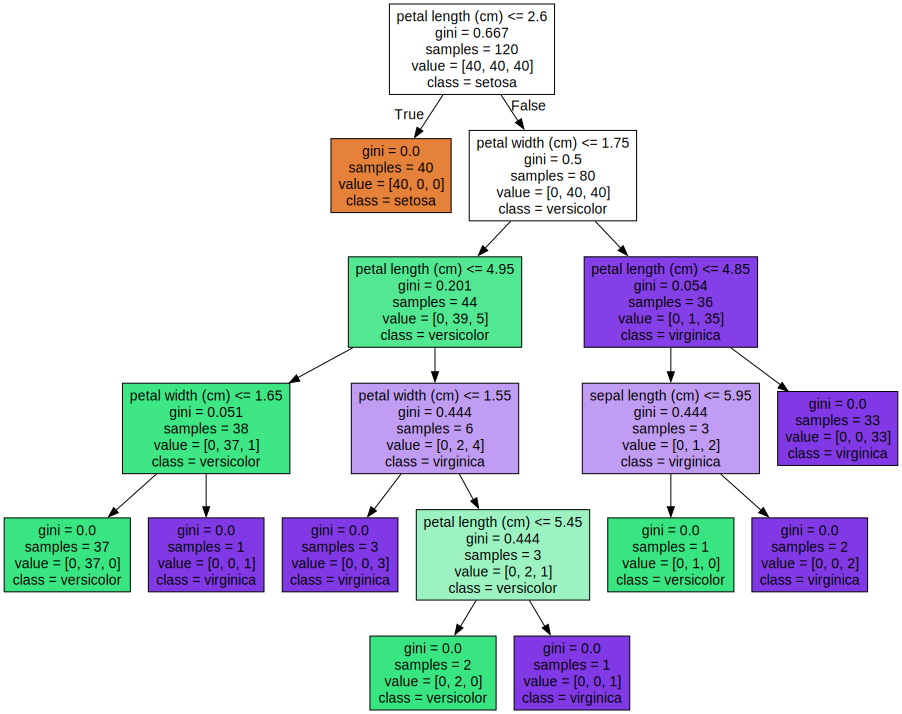

In [5]:
import graphviz
with open('data/tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

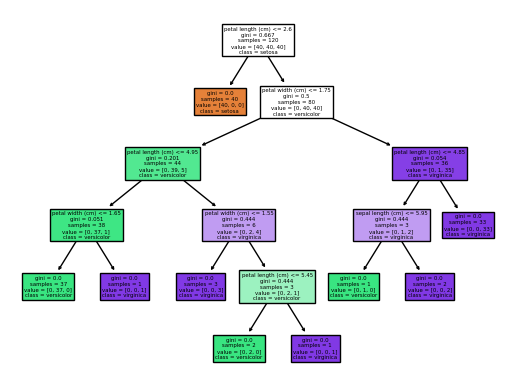

In [8]:
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True);

- 제약 조건: max_depth=3

In [9]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)
export_graphviz(
    dtc2, 'data/tree2.dot', feature_names=iris.feature_names,
    class_names=iris.target_names, filled=True
)

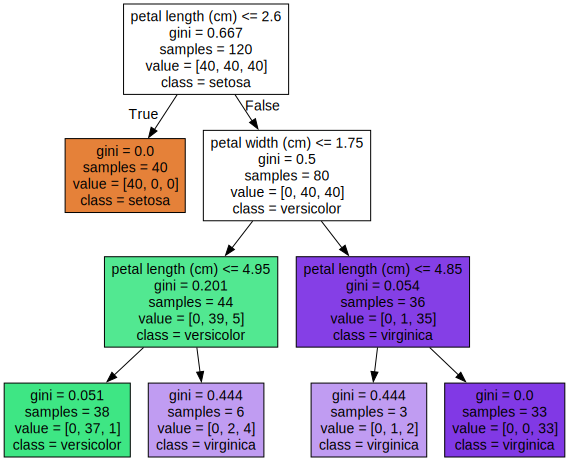

In [10]:
with open('data/tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 제약 조건: min_samples_split=4

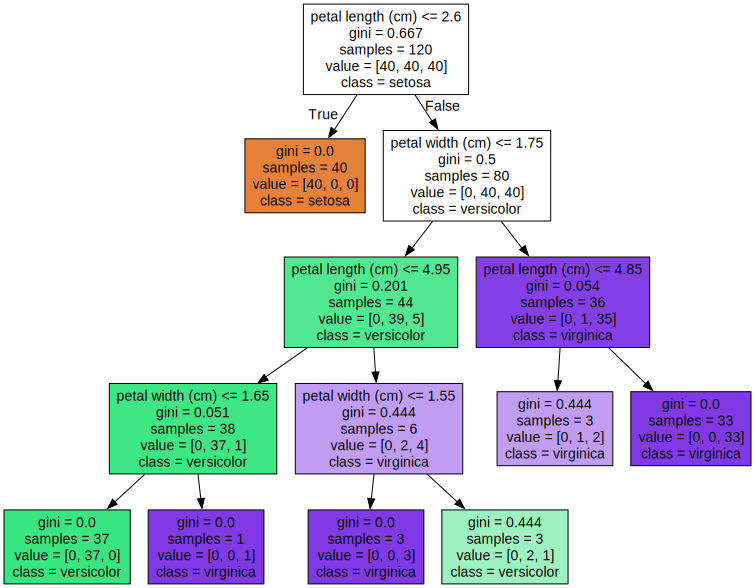

In [14]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)
export_graphviz(
    dtc3, 'data/tree3.dot', feature_names=iris.feature_names,
    class_names=iris.target_names, filled=True
)
with open('data/tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 모델 비교

In [15]:
dtc.score(X_test, y_test)
dtc2.score(X_test, y_test)
dtc3.score(X_test, y_test)

1.0

- 모델이 제공하는 정보: Feature importance

In [17]:
dtc.feature_importances_

array([0.01666667, 0.        , 0.57742557, 0.40590776])

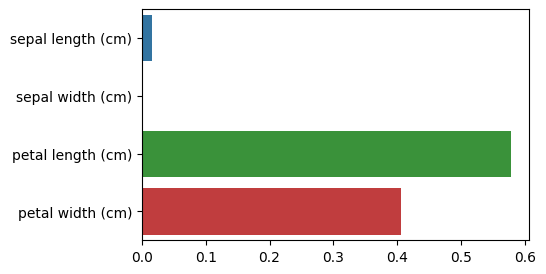

In [23]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names);

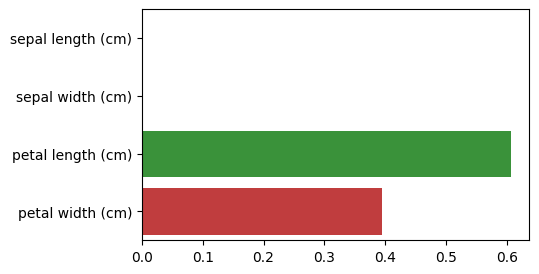

In [22]:
plt.figure(figsize=(5, 3))
sns.barplot(x=dtc2.feature_importances_, y=iris.feature_names);

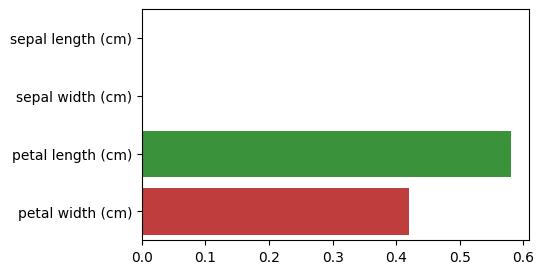

In [21]:
plt.figure(figsize=(5, 3))
sns.barplot(x=dtc3.feature_importances_, y=iris.feature_names);